--- Tabel Hasil Backtest ---
    Harga_MDKA  Posisi  Return_Strategi  Return_Kumulatif_Strategi  \
9         1710    -1.0         0.011561                  -0.036684   
10        1740     1.0         0.017544                  -0.019140   
11        1760     1.0         0.011494                  -0.007646   
12        1780     1.0         0.011364                   0.003718   
13        1820     1.0         0.022472                   0.026190   
14        1800     1.0        -0.010989                   0.015201   
15        1770     1.0        -0.016667                  -0.001466   
16        1750     1.0        -0.011299                  -0.012765   
17        1720     1.0        -0.017143                  -0.029908   
18        1760     1.0         0.023256                  -0.006652   
19        1800    -1.0        -0.022727                  -0.029380   

    Return_Kumulatif_Benchmark  
9                     0.036684  
10                    0.054228  
11                    0.065722 

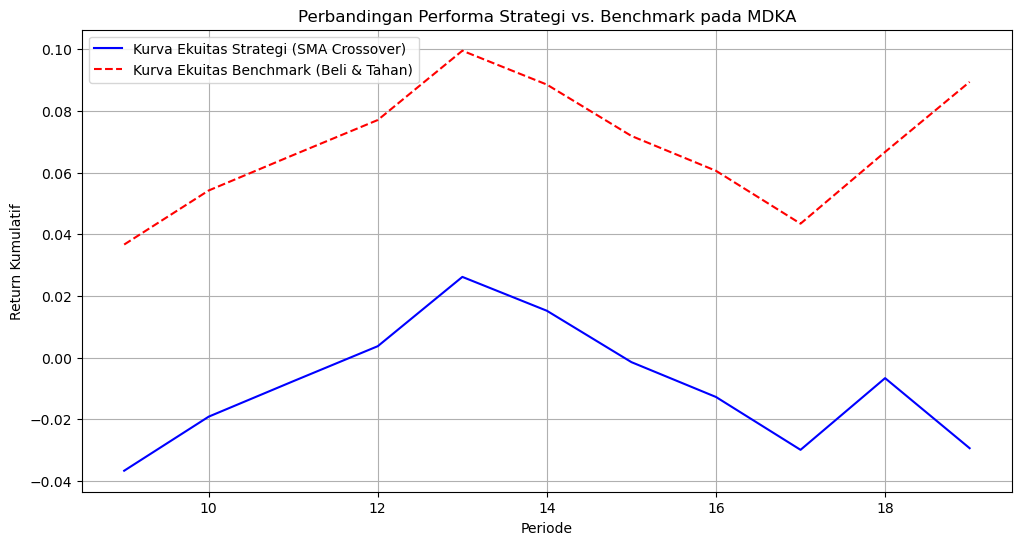

In [7]:
# ===================================================================
# Laporan Analisis Portofolio Komprehensif
# Tujuan: Menganalisis & Mengevaluasi Strategi SMA Crossover pada Saham MDKA
# ===================================================================

# --- Bagian 1: Import Library ---
# Mengimpor perkakas yang kita butuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ===================================================================
# --- Bagian 2: Persiapan Data ---
# ===================================================================

# Data Harga Penutupan MDKA Selama 20 Hari
harga_mdka = [
    1650, 1675, 1700, 1680, 1660, 1690, 1720, 1750, 1730, 1710,
    1740, 1760, 1780, 1820, 1800, 1770, 1750, 1720, 1760, 1800
]

# Membuat DataFrame Pandas dari data di atas
# DataFrame adalah tabel data utama kita
df = pd.DataFrame({'Harga_MDKA': harga_mdka})


# ===================================================================
# --- Bagian 3: Perhitungan Indikator & Generasi Sinyal ---
# ===================================================================

# Menghitung Simple Moving Average (SMA) cepat dan lambat
sma_cepat = 5
sma_lambat = 10
df['SMA_Cepat'] = df['Harga_MDKA'].rolling(window=sma_cepat).mean()
df['SMA_Lambat'] = df['Harga_MDKA'].rolling(window=sma_lambat).mean()

# Membuat kolom 'Sinyal' berdasarkan aturan crossover
# Jika SMA cepat > SMA lambat, sinyal Beli (1). Jika tidak, sinyal Jual (-1).
df['Sinyal'] = np.where(df['SMA_Cepat'] > df['SMA_Lambat'], 1, -1)


# ===================================================================
# --- Bagian 4: Proses Backtesting ---
# ===================================================================

# Menghitung return harian dari harga MDKA
df['Return_Harian'] = df['Harga_MDKA'].pct_change()

# Membuat kolom 'Posisi' dengan menggeser sinyal satu hari ke depan
# Karena posisi trading hari ini ditentukan oleh sinyal kemarin
df['Posisi'] = df['Sinyal'].shift(1)

# Menghitung return harian dari strategi kita
df['Return_Strategi'] = df['Return_Harian'] * df['Posisi']

# Menerapkan Stop-Loss (contoh: -3%)
# Ini adalah jaring pengaman untuk membatasi kerugian
batas_stop_loss = -0.03
df['Return_Strategi'] = np.where(df['Return_Strategi'] < batas_stop_loss,
                                  batas_stop_loss,
                                  df['Return_Strategi'])

# Menghitung return kumulatif (akumulasi keuntungan/kerugian) dari strategi
df['Return_Kumulatif_Strategi'] = df['Return_Strategi'].cumsum()

# Membuat benchmark 'Beli dan Tahan' sebagai pembanding
df['Return_Kumulatif_Benchmark'] = df['Return_Harian'].cumsum()


# ===================================================================
# --- Bagian 5: Analisis Metrik Performa ---
# ===================================================================

# Membersihkan data dari nilai NaN sebelum perhitungan metrik
df_bersih = df.dropna()

# Membuat SALINAN BARU yang independen untuk dianalisis
df_hasil = df_bersih.copy()

# Menghitung Total Return
total_return = df_hasil['Return_Kumulatif_Strategi'].iloc[-1]

# Menghitung Win Rate
jumlah_menang = (df_hasil['Return_Strategi'] > 0).sum()
total_trading = len(df_hasil)
win_rate = jumlah_menang / total_trading

# Menghitung Maximum Drawdown
df_hasil['Puncak_Tertinggi'] = df_hasil['Return_Kumulatif_Strategi'].cummax()
df_hasil['Drawdown'] = df_hasil['Puncak_Tertinggi'] - df_hasil['Return_Kumulatif_Strategi']
max_drawdown = df_hasil['Drawdown'].max()

# Menghitung Sharpe Ratio (versi sederhana yang di-anualisasi)
sharpe_ratio = (df_hasil['Return_Strategi'].mean() / df_hasil['Return_Strategi'].std()) * np.sqrt(252)


# ===================================================================
# --- Bagian 6: Visualisasi & Laporan ---
# ===================================================================

# Menampilkan tabel hasil numerik
print("--- Tabel Hasil Backtest ---")
print(df_hasil[['Harga_MDKA', 'Posisi', 'Return_Strategi', 'Return_Kumulatif_Strategi', 'Return_Kumulatif_Benchmark']])

# Menampilkan laporan metrik performa
print("\n" + "="*40)
print("      LAPORAN PERFORMA STRATEGI")
print("="*40)
print(f"Total Return                : {total_return:.2%}")
print(f"Win Rate                    : {win_rate:.2%}")
print(f"Maximum Drawdown            : {max_drawdown:.2%}")
print(f"Sharpe Ratio (Annualized)   : {sharpe_ratio:.2f}")
print("="*40)

# Membuat Grafik Perbandingan Kurva Ekuitas
plt.figure(figsize=(12, 6))
plt.plot(df_hasil.index, df_hasil['Return_Kumulatif_Strategi'], label='Kurva Ekuitas Strategi (SMA Crossover)', color='blue')
plt.plot(df_hasil.index, df_hasil['Return_Kumulatif_Benchmark'], label='Kurva Ekuitas Benchmark (Beli & Tahan)', color='red', linestyle='--')
plt.title('Perbandingan Performa Strategi vs. Benchmark pada MDKA')
plt.xlabel('Periode')
plt.ylabel('Return Kumulatif')
plt.legend()
plt.grid(True)
plt.show()


## Penjelasan Output Laporan Performa

### **1. Total Return (Imbal Hasil Total)**
* **Apa Artinya:** Ini adalah angka paling dasar: **total keuntungan atau kerugian akhir** dari strategi Anda selama seluruh periode *backtest*.
* **Cara Membaca:** Jika angkanya positif (misal, `8.50%`), berarti strategi Anda menghasilkan keuntungan. Jika negatif (misal, `-2.15%`), strategi Anda merugi. Ini adalah "nilai akhir" Anda.

### **2. Win Rate (Tingkat Kemenangan)**
* **Apa Artinya:** Ini adalah **persentase seberapa sering** trading Anda menghasilkan keuntungan.
* **Cara Membaca:** Jika Win Rate `45.00%`, itu berarti dari 100 kali trading, 45 di antaranya profit dan 55 sisanya rugi. Seperti yang sudah kita diskusikan, Win Rate tinggi tidak selalu berarti profit jika kerugiannya besar-besar.

### **3. Maximum Drawdown (Penurunan Maksimum)**
* **Apa Artinya:** Ini adalah metrik risiko terpenting. Ini mengukur **kerugian terbesar dari puncak ke lembah** yang pernah dialami oleh portofolio Anda.
* **Cara Membaca:** Jika Maximum Drawdown `15.20%`, itu berarti pada titik terburuknya, nilai modal Anda sempat anjlok sebesar 15.20% dari nilai tertingginya. Angka ini mengukur "rasa sakit" atau risiko terburuk yang harus Anda tahan. Semakin kecil angkanya, semakin baik.



### **4. Sharpe Ratio (Rasio Sharpe)**
* **Apa Artinya:** Ini adalah metrik efisiensi. Ia mengukur **seberapa besar imbal hasil yang Anda dapatkan untuk setiap unit risiko (volatilitas)** yang Anda ambil.
* **Cara Membaca:** Semakin tinggi angkanya, semakin baik.
    * **> 1.0:** Dianggap sangat bagus (return tinggi untuk risiko yang diambil).
    * **0 - 1.0:** Dianggap cukup baik.
    * **< 0:** Dianggap buruk (rata-rata return Anda negatif).

### **5. Grafik Kurva Ekuitas (Equity Curve)**
* **Apa Artinya:** Ini adalah visualisasi dari perjalanan modal Anda dari waktu ke waktu.
* **Cara Membaca:**
    * **Garis Biru:** Performa strategi SMA Crossover Anda.
    * **Garis Merah:** Performa *benchmark* (strategi pasif "Beli dan Tahan").
    * **Tujuan Anda:** Ingin melihat garis biru secara konsisten berada **di atas** garis merah dan bergerak dari kiri bawah ke kanan atas secara **mulus**.

Dengan melihat semua metrik ini secara bersamaan, Anda mendapatkan gambaran yang sangat lengkap tentang tidak hanya **seberapa besar keuntungan** sebuah strategi, tetapi juga **seberapa berisiko "perjalanan"** untuk mendapatkan keuntungan tersebut.